In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
mpl.rcParams.update(mpl.rcParamsDefault)

In [7]:
def match_directories(base_directory):
    temp_dict = {}
    symmetry_dict = {}
    energy_dict = {}

    for _, _, files in os.walk(base_directory):
        for file in files:
            file_parts = file.split("-")

            energy = file_parts[0]
            symmetry = file_parts[1]
            temperature = file_parts[2].replace(".txt", "")

            temp_key = (energy, symmetry)
            symmetry_key = (energy, temperature)
            energy_key = (symmetry, temperature)

            if temp_key not in temp_dict:
                temp_dict[temp_key] = []
            if symmetry_key not in symmetry_dict:
                symmetry_dict[symmetry_key] = []
            if energy_key not in energy_dict:
                    energy_dict[energy_key] = []

            temp_dict[temp_key].append(file)
            symmetry_dict[symmetry_key].append(file)
            energy_dict[energy_key].append(file)

    return temp_dict, symmetry_dict, energy_dict

In [8]:
def plot_datasets(files_dict, log_scale: False, mode: str):
    color_map = {
        "0.03K": "blue",
        "1K": "aqua",
        "4K": "deepskyblue",
        "70K": "orange",
        "300K": "tomato"
    }
    markers = ['o', 's', '^', 'D', '*']
    marker_index = 0
    plt.figure(figsize=(10, 6))
    for filename, data in files_dict.items():
        file_parts = filename.split("-")

        energy = file_parts[0]
        symmetry = file_parts[1]
        temperature = file_parts[2].replace(".txt", "")
        for i, data in enumerate(data):
            plt.plot(
                data["Voltage (V)"], data["Current (A)"],
                marker=markers[marker_index % len(markers)],
                color=color_map.get(temperature, "pink"),
                label=f"temperature={temperature}"
            )
            plt.title(f"Drain Current vs. Drain Voltage Characteristics for {symmetry} contract inputs and up spin energy {energy}")

            # plt.title(f"Drain Current vs. Drain Voltage Characteristics for {voltage_condition} and dimensions of {dimensions}")
            plt.xlabel("Voltage (V)")
            if log_scale == True:
                plt.ylabel("Current (A) (Log scale)")
            else:
                plt.ylabel("Current (A)")
            # Uncomment the next line if you want a logarithmic Y-axis
            if log_scale == True:    
                plt.yscale("log", base=10)
            plt.legend()
            plt.grid(True, which="both", linestyle="--", linewidth=0.5)

            marker_index += 1

    if log_scale == True:
        save_directory  = f"plots/temperature/log_scale"
    else:      
        save_directory  = f"plots/temperature/natural_scale"
    os.makedirs(save_directory, exist_ok=True)
    file_name = f"{energy}_{symmetry}.png"
    file_path = os.path.join(save_directory, file_name)
    plt.savefig(file_path, format="png", dpi=300)

    plt.show()

In [9]:
base_directory= "data/single-QD"

temp_dict, symmetry_dict, energy_dict = match_directories(base_directory)

In [ ]:
for filenames in temp_dict.values():
    files_dict = {}
    for filename in filenames:
        key = filename
        if key not in files_dict:
            files_dict[key] = []

        data = pd.read_csv(os.path.join(base_directory, filename), skiprows=4, names=["Voltage (V)", "Current (A)"])
        data["Voltage (V)"] = pd.to_numeric(data["Voltage (V)"], errors="coerce")
        data["Current (A)"] = pd.to_numeric(data["Current (A)"], errors="coerce")

        files_dict[filename].append(data)
        
    plot_datasets(files_dict, log_scale=False)

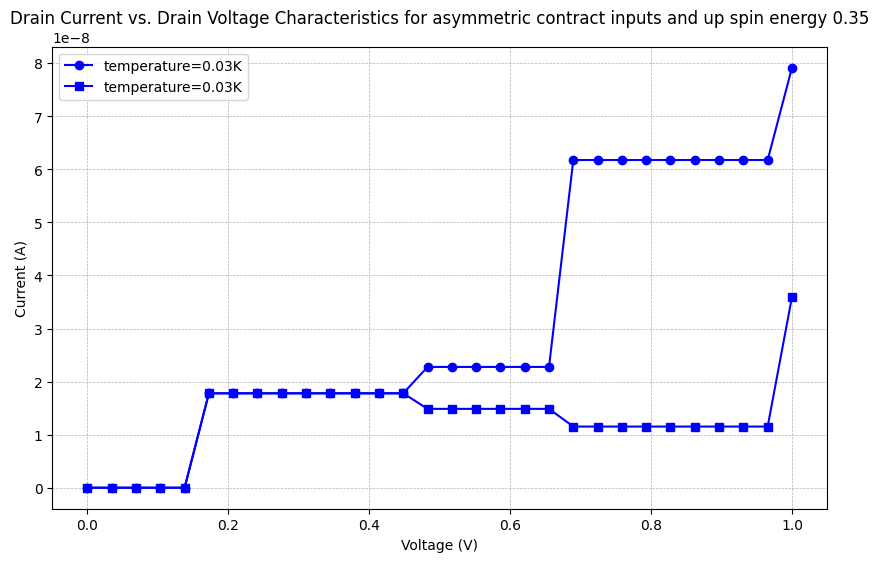

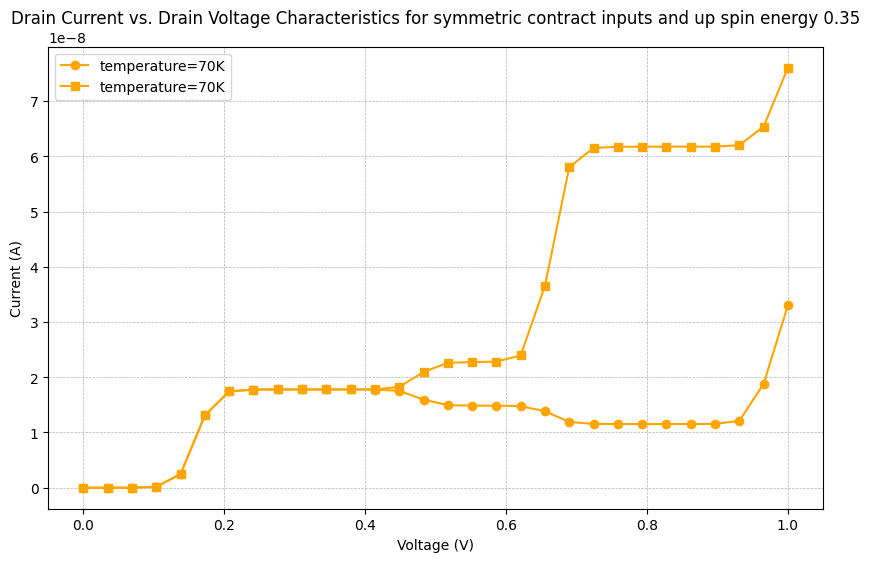

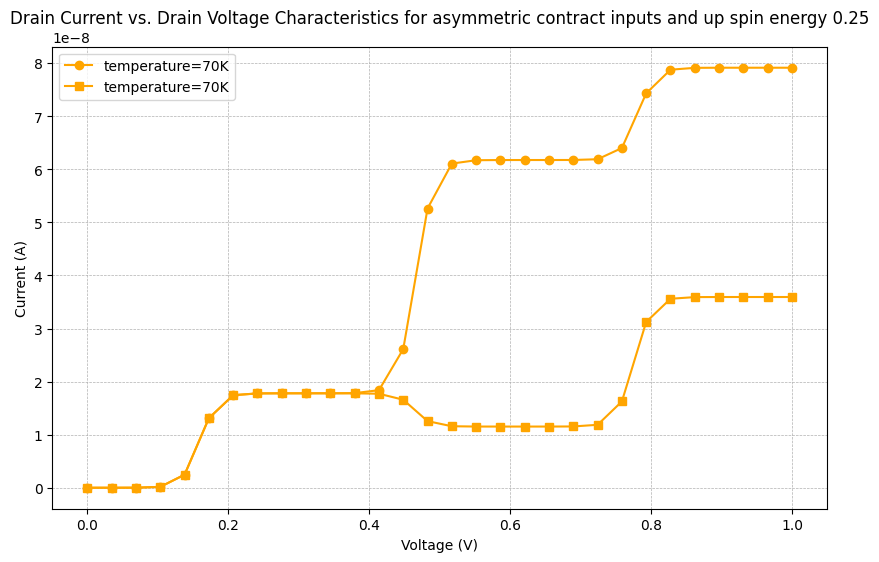

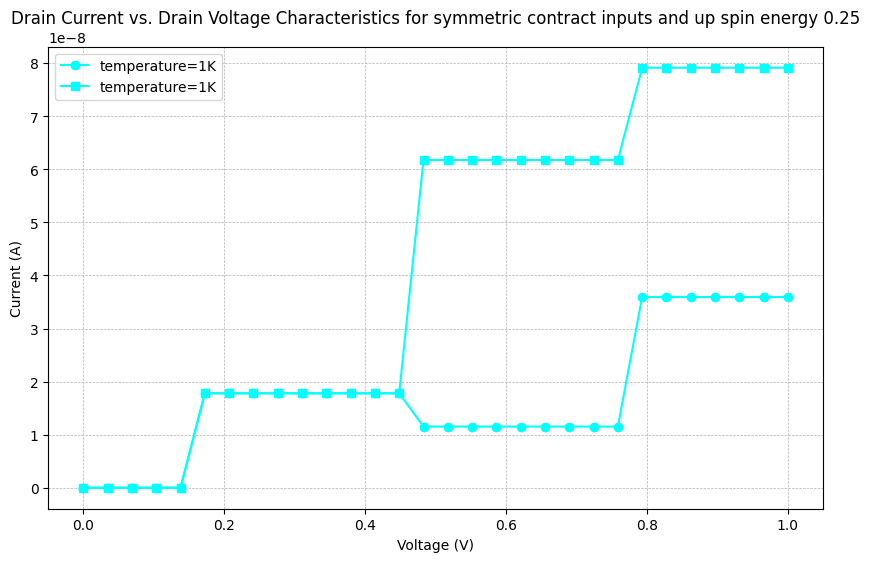

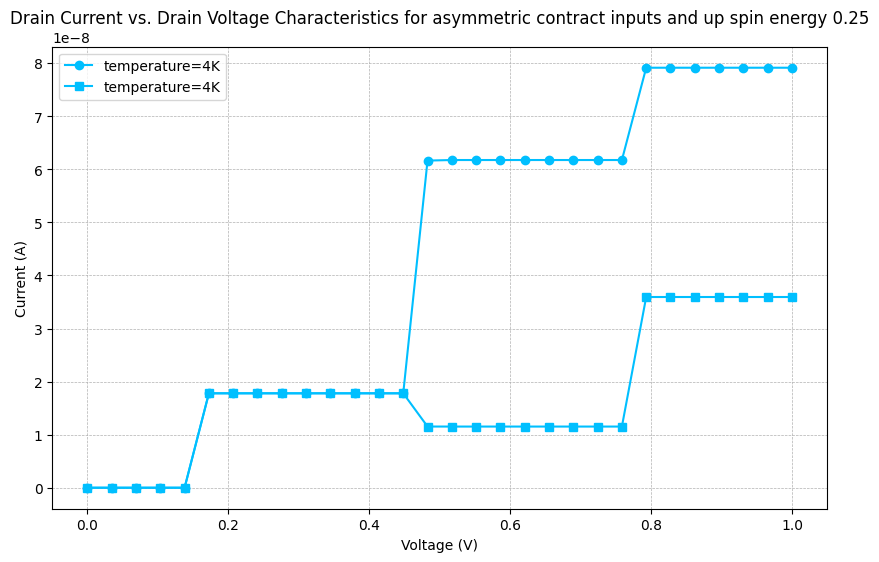

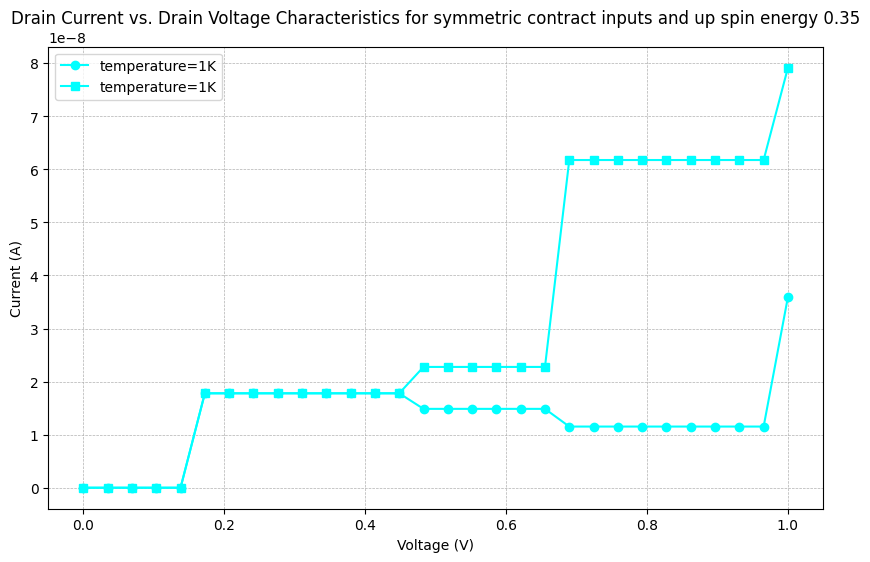

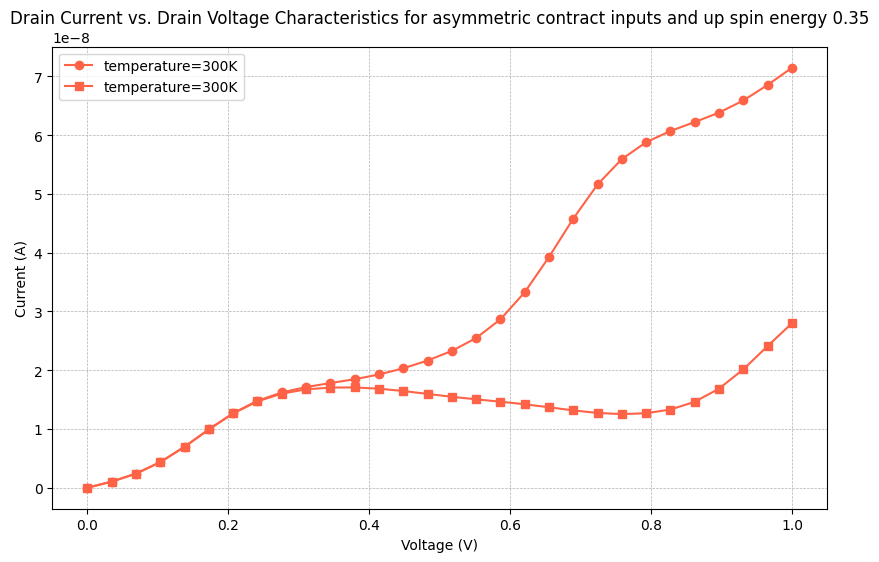

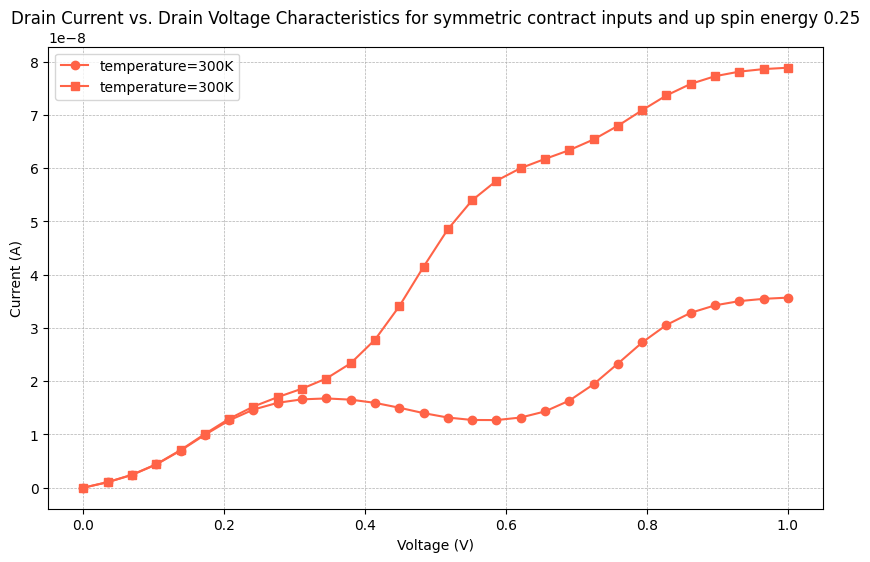

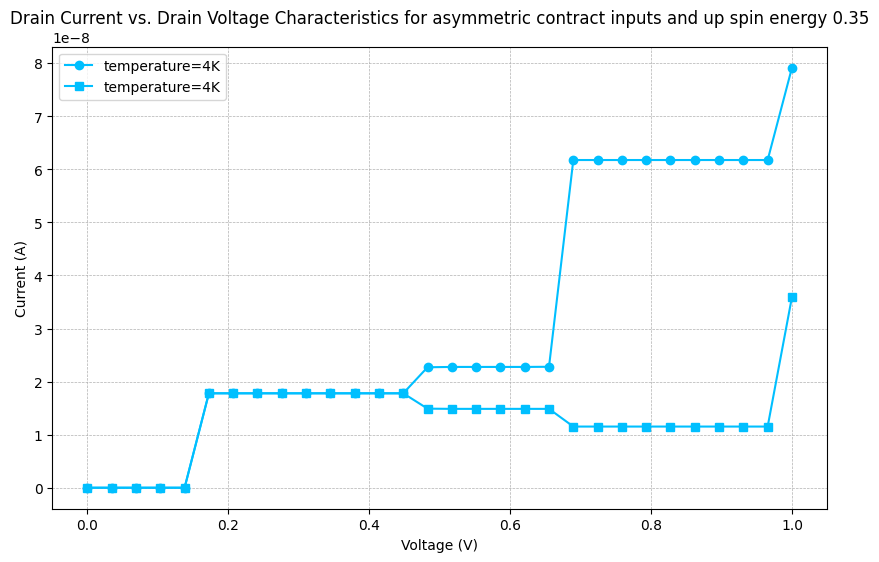

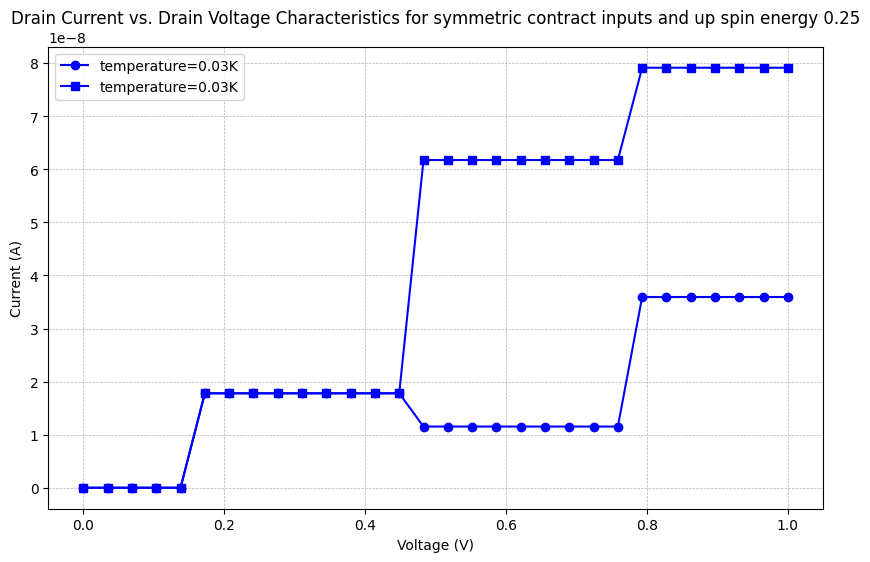

In [13]:
for filenames in symmetry_dict.values():
    files_dict = {}
    for filename in filenames:
        key = filename
        if key not in files_dict:
            files_dict[key] = []

        data = pd.read_csv(os.path.join(base_directory, filename), skiprows=4, names=["Voltage (V)", "Current (A)"])
        data["Voltage (V)"] = pd.to_numeric(data["Voltage (V)"], errors="coerce")
        data["Current (A)"] = pd.to_numeric(data["Current (A)"], errors="coerce")

        files_dict[filename].append(data)
        
    plot_datasets(files_dict, log_scale=False, )

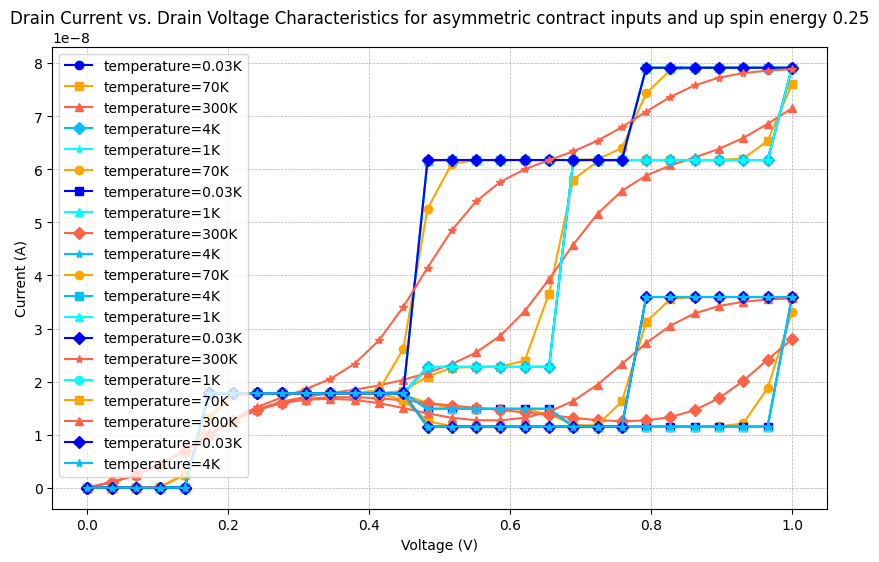

In [10]:
files_dict = {}
for filenames in temp_dict.values():

    for filename in filenames:
        key = filename
        if key not in files_dict:
            files_dict[key] = []

        data = pd.read_csv(os.path.join(base_directory, filename), skiprows=4, names=["Voltage (V)", "Current (A)"])
        data["Voltage (V)"] = pd.to_numeric(data["Voltage (V)"], errors="coerce")
        data["Current (A)"] = pd.to_numeric(data["Current (A)"], errors="coerce")

        files_dict[filename].append(data)
plot_datasets(files_dict, log_scale=False)